**<h1>Probability and Statistics</h1>**


**<h4> Group Members : </h4>**
<p>1. Mahnoor Iqbal <br>
2. Aqsa Majeed</p>

In [56]:
# Importing libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical calculations
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Advanced visualizations
from scipy import stats  # Statistical testing
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.linear_model import LogisticRegression  # ML model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation


In [57]:
from google.colab import files
files.upload()  # Use this to upload the CSV file


Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction (1).csv


{'Heart_Disease_Prediction (1).csv': b'Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease\r\n70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence\r\n67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence\r\n57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence\r\n64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence\r\n74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence\r\n65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence\r\n56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence\r\n59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence\r\n60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence\r\n63,0,4,150,407,0,2,154,0,4,2,3,7,Presence\r\n59,1,4,135,234,0,0,161,0,0.5,2,0,7,Absence\r\n53,1,4,142,226,0,2,111,1,0,1,0,7,Absence\r\n44,1,3,140,235,0,2,180,0,0,1,0,3,Absence\r\n61,1,1,134,234,0,0,145,0,2.6,2,2,3,Presence\r\n57,0,4,128,303,0,2,159,0,0,1,1,3,Absence\r\n71,0,4,112,149,0,0,125,0,1.6,2,0,3,Absence\r\n46,1,4,140,311,0,0,120,1,1.8,2,2,7,Presence\r\n53,1,4,140,203,1

In [58]:
#Reading dataset
import pandas as pd
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [59]:
# View the data
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


**<h1>Task 1: Data Cleaning</h1>**
<p>Handling missing values</p>

In [60]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


<p>Removing duplicate rows </p>

In [61]:
# Remove duplicate rows
df = df.drop_duplicates()


<p>Renaming columns for simplicity<p>

In [62]:
# Rename columns to provide more descriptive and consistent column names
df = df.rename(columns={"Sex": "Gender", "BP": "Blood_Pressure","Max HR": "Max_Heart_Rate"})
df.head()

,Age,Gender,Chest pain type,Blood_Pressure,Cholesterol,FBS over 120,EKG results,Max_Heart_Rate,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


<p>Droping columns that we dont need<p>

In [63]:
# Drop specified columns that are no longer needed for analysis
df = df.drop(columns=["FBS over 120","EKG results","Exercise angina","ST depression","Slope of ST","Number of vessels fluro","Thallium"])
df.head()

,Age,Gender,Chest pain type,Blood_Pressure,Cholesterol,Max_Heart_Rate,Heart Disease
0,70,1,4,130,322,109,Presence
1,67,0,3,115,564,160,Absence
2,57,1,2,124,261,141,Presence
3,64,1,4,128,263,105,Absence
4,74,0,2,120,269,121,Absence


**<h1>Task 2: Common Statistics</h1>**
<p>Printing mean, median, mode and standard deviation</p>

In [64]:
# Check column data types
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              270 non-null    int64 
 1   Gender           270 non-null    int64 
 2   Chest pain type  270 non-null    int64 
 3   Blood_Pressure   270 non-null    int64 
 4   Cholesterol      270 non-null    int64 
 5   Max_Heart_Rate   270 non-null    int64 
 6   Heart Disease    270 non-null    object
dtypes: int64(6), object(1)
memory usage: 14.9+ KB
None
(270, 7)


In [10]:
# Summary of numerical columns
print(df.describe())


              Age      Gender  Chest pain type  Blood_Pressure  Cholesterol  \
count  270.000000  270.000000       270.000000      270.000000   270.000000   
mean    54.433333    0.677778         3.174074      131.344444   249.659259   
std      9.109067    0.468195         0.950090       17.861608    51.686237   
min     29.000000    0.000000         1.000000       94.000000   126.000000   
25%     48.000000    0.000000         3.000000      120.000000   213.000000   
50%     55.000000    1.000000         3.000000      130.000000   245.000000   
75%     61.000000    1.000000         4.000000      140.000000   280.000000   
max     77.000000    1.000000         4.000000      200.000000   564.000000   

       Max_Heart_Rate  
count      270.000000  
mean       149.677778  
std         23.165717  
min         71.000000  
25%        133.000000  
50%        153.500000  
75%        166.000000  
max        202.000000  


**<h1>Task 3: Frequency Distribution Tables</h1>**
<p>Creating frequency distribution tables and plotting their graphs</p>

In [11]:
# Frequency distribution for categorical variables
print(df['Heart Disease'].value_counts())

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64


In [12]:
#frequency distribution graphs for all columns
sns.set(font_scale=1.5)
def freq_dist(data):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            g=np.histogram(df[col],bins=5,density=False)
            col1=[]
            col2=[]
            for i in range(len(g[0])):
                col1.append(g[0][i])
                col2.append(f'{round(g[1][i],2)} - {round(g[1][i+1],2)}')
            l=pd.DataFrame({f'{col}_distribution':col2,'freq':col1})
            l.set_index(f'{col}_distribution', inplace=True)
            display(l)
            sns.displot(df[col], kde=True,bins=10).set(title=col)
            plt.show()
            print("----------------------------------------------------------------------------------------------------")

,freq
Age_distribution,
29.0 - 38.6,9
38.6 - 48.2,65
48.2 - 57.8,85
57.8 - 67.4,95
67.4 - 77.0,16


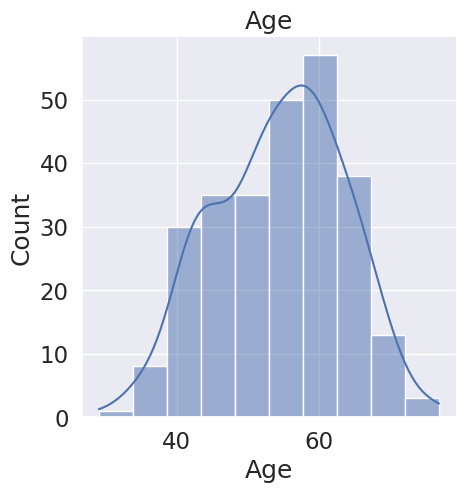

----------------------------------------------------------------------------------------------------


,freq
Gender_distribution,
0.0 - 0.2,87
0.2 - 0.4,0
0.4 - 0.6,0
0.6 - 0.8,0
0.8 - 1.0,183


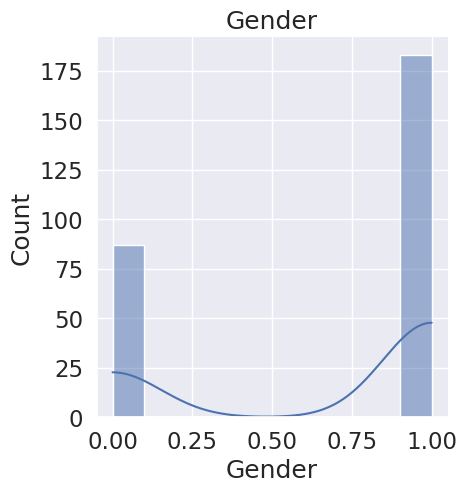

----------------------------------------------------------------------------------------------------


,freq
Chest pain type_distribution,
1.0 - 1.6,20
1.6 - 2.2,42
2.2 - 2.8,0
2.8 - 3.4,79
3.4 - 4.0,129


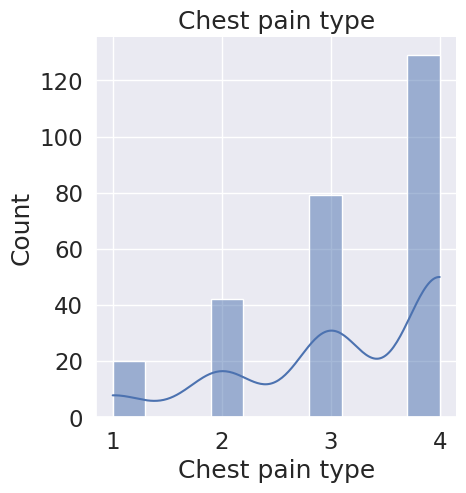

----------------------------------------------------------------------------------------------------


,freq
Blood_Pressure_distribution,
94.0 - 115.2,49
115.2 - 136.4,124
136.4 - 157.6,73
157.6 - 178.8,19
178.8 - 200.0,5


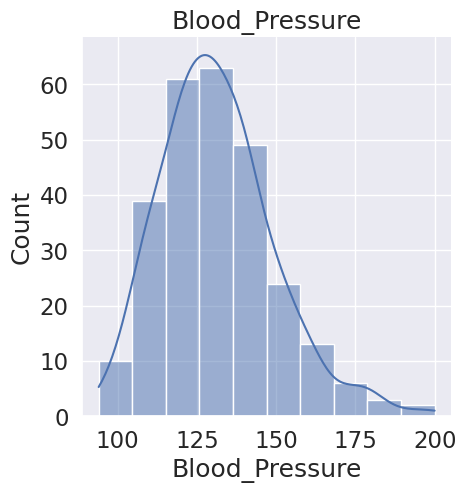

----------------------------------------------------------------------------------------------------


,freq
Cholesterol_distribution,
126.0 - 213.6,69
213.6 - 301.2,160
301.2 - 388.8,36
388.8 - 476.4,4
476.4 - 564.0,1


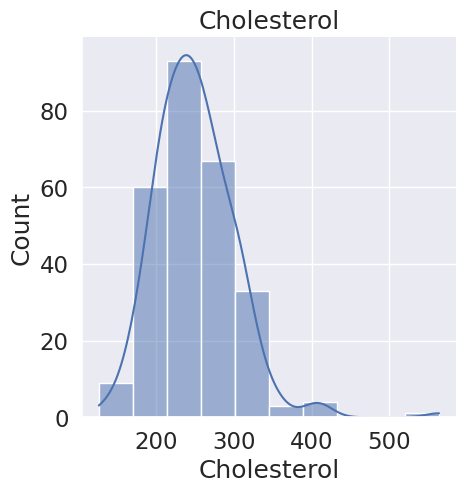

----------------------------------------------------------------------------------------------------


,freq
Max_Heart_Rate_distribution,
71.0 - 97.2,6
97.2 - 123.4,34
123.4 - 149.6,76
149.6 - 175.8,125
175.8 - 202.0,29


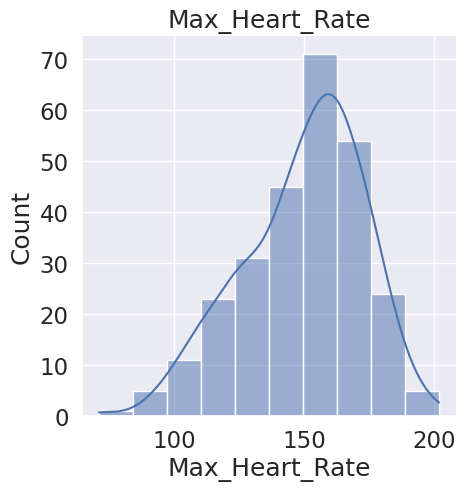

----------------------------------------------------------------------------------------------------


In [13]:
# Call the function with your DataFrame
freq_dist(df)

**<h3>Univariate Analysis</h3>**

<ipython-input-15-96ce4b7ee3f2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


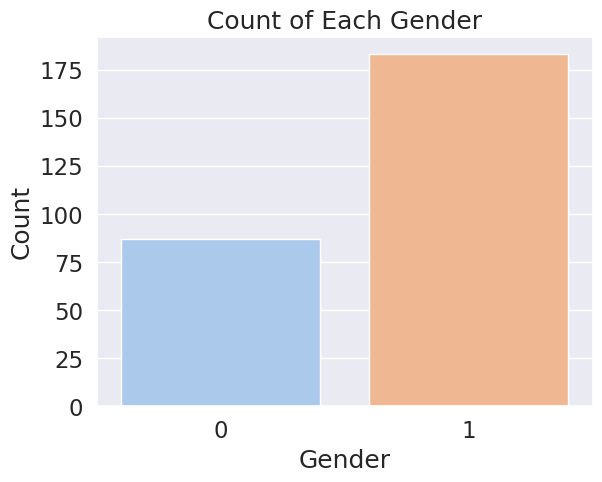

In [15]:
#count plot to visualize the distribution of 'Gender' in the dataset
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title("Count of Each Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

<ipython-input-17-f4590a77c252>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Chest pain type', palette='pastel')


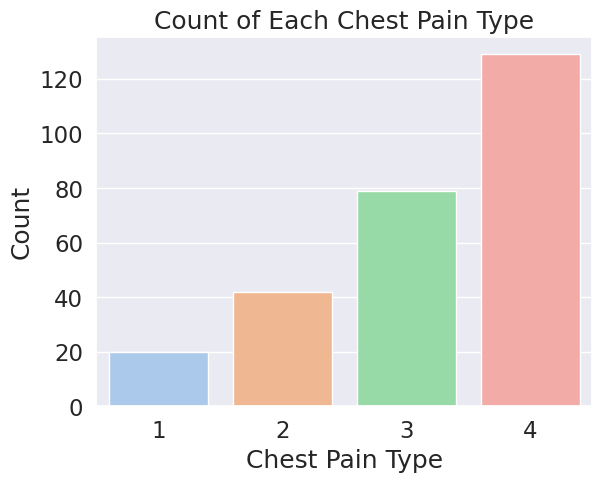

In [17]:
#count plot to visualize the distribution of 'Chest pain typer' in the dataset
sns.countplot(data=df, x='Chest pain type', palette='pastel')
plt.title("Count of Each Chest Pain Type")
#plt.xticks(rotation=45, ha="right")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

**<h1>Task 4: Finding relations between different parameters by plotting graphs(Bivariate Analysis)</h1>**


<p>Plotting relation between Age and Cholestrol for Heart disease.</p>

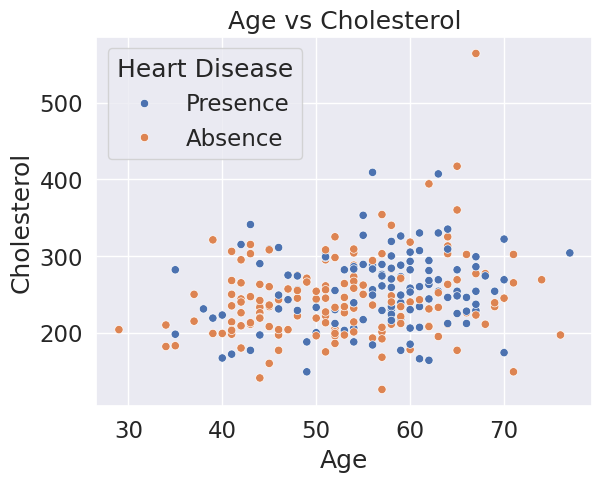

In [18]:
# Scatter plot for numerical variables
sns.scatterplot(x='Age', y='Cholesterol', hue='Heart Disease', data=df)
plt.title('Age vs Cholesterol')
plt.show()


<p>Plotting relation between Age and Blood Pressure for Heart disease.</p>

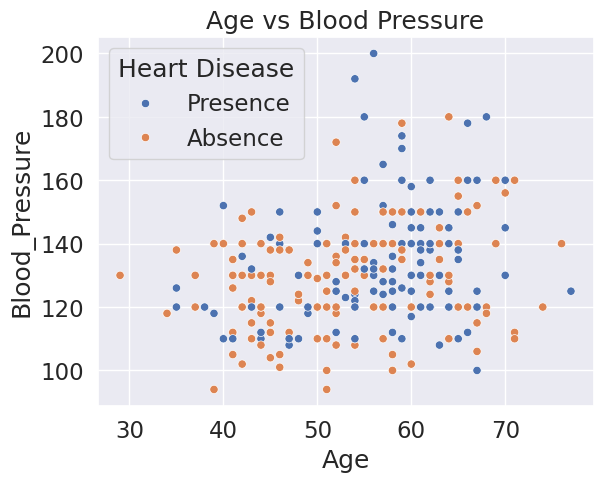

In [19]:
# Scatter plot for numerical variables
sns.scatterplot(x='Age', y='Blood_Pressure', hue='Heart Disease', data=df)
plt.title('Age vs Blood Pressure')
plt.show()

<p>Plotting relation between Gender and Maximum Heart Rate for Heart disease.</p>

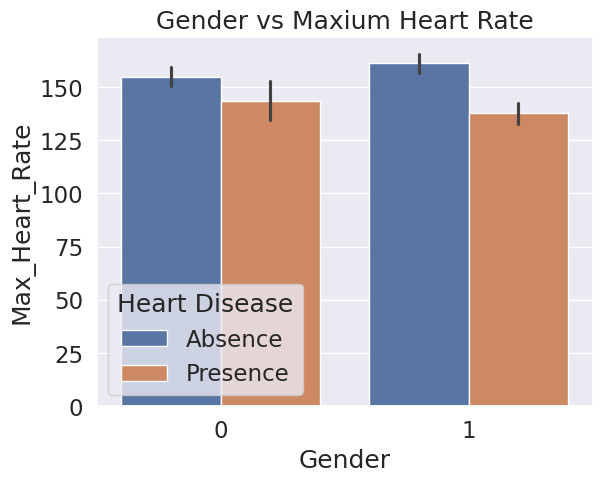

In [20]:
# Scatter plot for numerical variables
sns.barplot(x='Gender', y='Max_Heart_Rate', hue='Heart Disease', data=df)
plt.title('Gender vs Maximum Heart Rate')
plt.show()

**<h1>Task 5: Correlation using heatmap.</h1>**

In [21]:
# Encoding binary categorical variables
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})


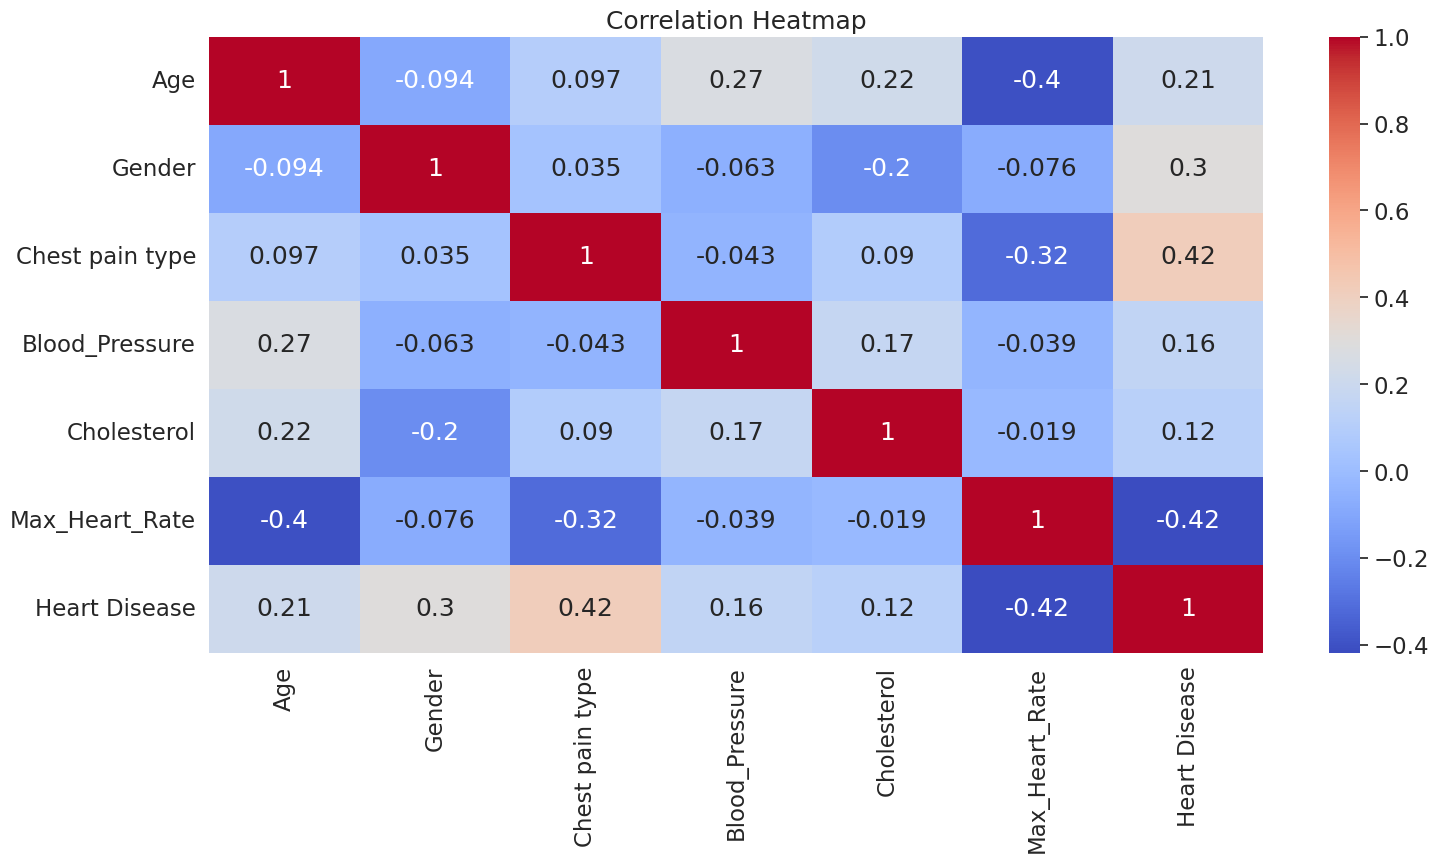

In [22]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation heatmap
plt.figure(figsize=(17, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**<h1>Task 6: Hypothesis Testing.</h1>**

**<h2>Hypothesis 01: People with high cholesterol have more heart disease compared to normal people .</h2>**

In [25]:

# Now perform the t-test for Cholesterol
group1 = df[df['Heart Disease'] == 0]['Cholesterol']  # Group with target=0 (no disease)
group2 = df[df['Heart Disease'] == 1]['Cholesterol']  # Group with target=1 (disease)
# Perform the t-test
from scipy import stats
t_stat, p_value = stats.ttest_ind(group1, group2)

# Output the t-test results
print("T-Test Results:")
print("T-Statistic:", t_stat)
print("P-value:", p_value)

# Interpret the result
if p_value < 0.05:
    print("As p value is less than 0.05 so we reject the null hypothesis H₀ that mean people with high cholesterol donot have heart disease compared to normal people.")
else:
    print("As p value is greater than 0.05 so we fail to reject the null hypothesis H₀ that mean people with high cholesterol have heart disease compared to normal people.")


T-Test Results:
T-Statistic: -1.9456773919731811
P-value: 0.052738885570342814
As p value is greater than 0.05 so we fail to reject the null hypothesis H₀ that mean people with high cholesterol have heart disease compared to normal people.


**<h2>Hypothesis 02:  Males have heart diseases more than female .</h2>**

In [27]:

# Now perform the t-test for Gender
group1 = df[df['Heart Disease'] == 0]['Gender']  # Group with target=0 (no disease)
group2 = df[df['Heart Disease'] == 1]['Gender']  # Group with target=1 (disease)
# Perform the t-test
from scipy import stats
t_stat, p_value = stats.ttest_ind(group1, group2)

# Output the t-test results
print("T-Test Results:")
print("T-Statistic:", t_stat)
print("P-value:", p_value)

# Interpret the result
if p_value < 0.05:
    print("As p value is less than 0.05 so we reject the null hypothesis H₀ that mean Males dont have heart diseases more than female (reject H₀).")
else:
    print("As p value is greater than 0.05 so we fail to reject the null hypothesis H₀ that mean Males have heart diseases more than female (fail to reject H₀).")


T-Test Results:
T-Statistic: -5.10541403316795
P-value: 6.26693794993593e-07
As p value is less than 0.05 so we reject the null hypothesis H₀ that mean Males dont have heart diseases more than female (reject H₀).


**<h1>Task 07: Model Training and Prediction.</h1>**

In [28]:
# Check the shape of the dataset (rows, columns)
print(df.shape)  # Should show (rows, columns)
print(df.head())  # Should show the first few rows of the dataset

(270, 7)
   Age  Gender  Chest pain type  Blood_Pressure  Cholesterol  Max_Heart_Rate  \
0   70       1                4             130          322             109   
1   67       0                3             115          564             160   
2   57       1                2             124          261             141   
3   64       1                4             128          263             105   
4   74       0                2             120          269             121   

   Heart Disease  
0              1  
1              0  
2              1  
3              0  
4              0  


In [29]:
# Ensure 'target' exists and is correctly separated
X = df.drop('Heart Disease', axis=1)  # Features (excluding the target column)
y = df['Heart Disease']  # Target variable (the column you want to predict)

# Check the shapes again to verify that the data is correctly separated
print(X.shape)  # Should not be (0, X)
print(y.shape)  # Should not be (0,)


(270, 6)
(270,)


**<h2>Training with 80% of data.</h2>**

In [30]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to confirm the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(216, 6) (54, 6) (216,) (54,)


  </p>Data has been split into training and testing sets. Training set consists of 80% of the data, while testing set contains 20%. </p>

In [31]:
# Initialize the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8519


<p>The model has been trained using the training data and evaluated using the testing data. The accuracy score gives us an overall measure of how well the model is performing on unseen data.</p>

In [ ]:
# Predict the target variable on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9259


In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[32  1]
 [ 3 18]]


<p>The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives. This helps assess where the model is making errors.</p>

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 0.0741


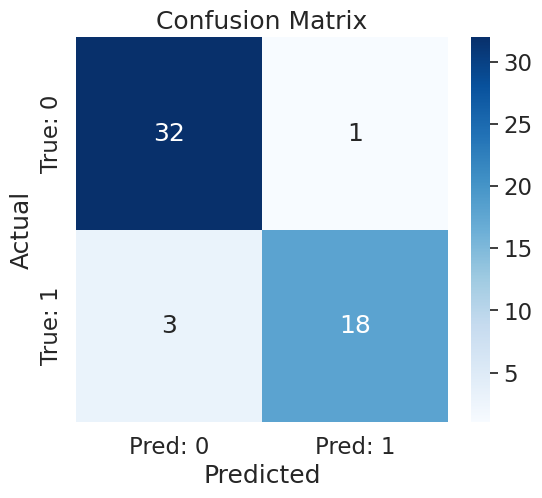

In [ ]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Conclusion**: The model demonstrates strong performance with an accuracy of 92.6%, a high precision of 94.7%, and a good recall of 85.7%, indicating its ability to identify heart disease cases effectively while minimizing false positives.

**<h2>Training with 60% of data.</h2>**

In [32]:
# Split the data (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Check the shapes to confirm the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(162, 6) (108, 6) (162,) (108,)


   </p>Data has been split into training and testing sets. Training set consists of 60% of the data, while testing set contains 40%. </p>

In [33]:
# Initialize the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7407


<p>The model has been trained using the training data and evaluated using the testing data. The accuracy score gives us an overall measure of how well the model is performing on unseen data.</p>

In [34]:
# Predict the target variable on the test set
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7407


In [36]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[52 11]
 [17 28]]


<p>The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives. This helps assess where the model is making errors.</p>

In [37]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        63
           1       0.72      0.62      0.67        45

    accuracy                           0.74       108
   macro avg       0.74      0.72      0.73       108
weighted avg       0.74      0.74      0.74       108



In [38]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.2593


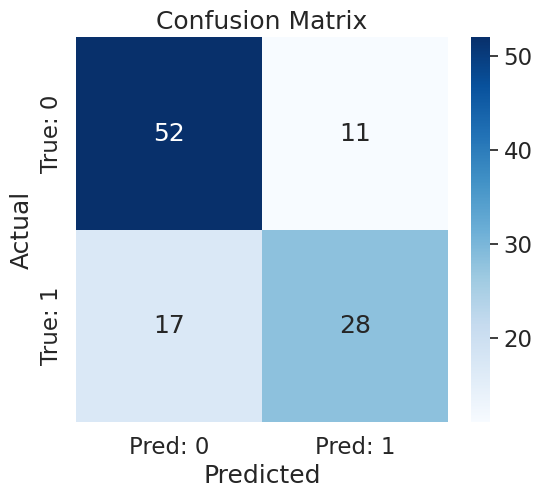

In [39]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Conclusion**: The model has an accuracy of 74.1%, but its recall rate of 62.2% indicates room for improvement, particularly in identifying heart disease cases (reducing false negatives).

**<h2>Training with 50% of data.</h2>**

In [40]:
# Split the data (50% training, 50% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Check the shapes to confirm the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(135, 6) (135, 6) (135,) (135,)


  </p>Data has been split into training and testing sets. Training set consists of 50% of the data, while testing set contains 50%. </p>

In [41]:
# Initialize the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7259


<p>The model has been trained using the training data and evaluated using the testing data. The accuracy score gives us an overall measure of how well the model is performing on unseen data.</p>

In [42]:
# Predict the target variable on the test set
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7259


In [44]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[61 19]
 [18 37]]


<p>The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives. This helps assess where the model is making errors.</p>

In [45]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77        80
           1       0.66      0.67      0.67        55

    accuracy                           0.73       135
   macro avg       0.72      0.72      0.72       135
weighted avg       0.73      0.73      0.73       135



In [46]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.2741


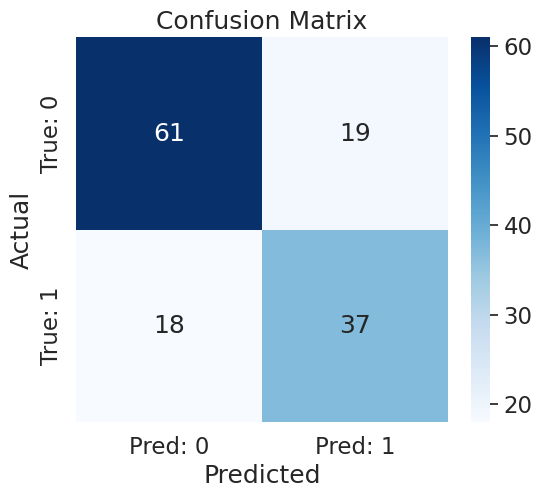

In [47]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Conclusion:** The model demonstrates a moderate performance with an accuracy of 72.6%, but it needs improvement, particularly in reducing false negatives, as missed heart disease diagnoses could lead to critical health risks.

**<h2>Conclusion:</h2>**
In this heart disease prediction project, we preprocessed the data through feature engineering, encoding, and cleaning. A logistic regression model was trained and evaluated, achieving an accuracy of 92.6%, precision of 94.7%, and recall of 85.7%. The model performs well in predicting both the presence and absence of heart disease, though further improvements in recall could reduce false negatives. Overall, the model is effective for heart disease prediction, with potential for optimization.